<span style="font-size:18px">
    
# <font color=maroon>Introduction

In the culture of statistical inference, particularly within the Frequentist framework, probability is understood in terms of **long-run frequency** — the idea that the probability of an event reflects how often it would occur in a large number of repeated trials. This foundational view supports much of modern data analysis, where conclusions about a **target population** are drawn based on a smaller, representative sample.

The **target population** refers to the complete group we aim to understand, but due to practical constraints, data is typically collected from a **sampled population**, ideally chosen at random. A **random sample** ensures that every member of the population has a known and equal chance of selection, which allows the use of probability theory to justify the reliability of inferences. From this sample, we compute **statistics** — such as the sample mean, variance, or proportion — which are numerical summaries based solely on observed data. These statistics are then used to estimate unknown characteristics (parameters) of the population. To evaluate and support these estimations, we rely on **theoretical probability distributions**, which describe how such statistics would behave across many repeated samples. Altogether, these concepts enable us to make reasoned, probabilistic statements about populations using only sample data.


    
## Sampling Distribution 

Frequntist probability of an event $\mathcal{A}$ (from a random experiment, $\mathcal{E}$) is based on relative frequency (number of times $\mathcal{A}$ is repeated) in many trials of $\mathcal{E}$. Here, probability is defined as a repeatable objective way out of "sufficiently" long-run of the experiment. This may be understood as

$$p(\mathcal{A})= \lim_{n \to \infty} \frac{m}{n}$$

where $n$ is the number of trials of $\mathcal{E}$ and $m$ is  the frequency of $\mathcal{A}$ in $n$ trials

This basic notion is considered while building the inferential principles of frequntist statistics. Most of the studies (involved with random experiments) are conducted with samples drawn from a study population which is a part (or subset) of a target population about which the study is aimed to generalize the findings from sample. In this process, data is expected to be a repeatable process in that samples are drawn from many trials. There could be many sampling methods through which data are collected for a reasonable way to get representative samples so as to generealize the quantity of interest (parameter) about the population. Further, it is assemed that parameters are fixed constant but random and **inference** about it can be done via the samples

While doing so, it is assuemd that (theoretically) once the quantity leading to the parameter is calculated from each sample for "sufficiently large" number of times. That gives a distribution of values for the parameter calculated from the sample which is called **statistic** and the distribution is said to be **Sampling distribution**

---

# <font color=maroon> An Example - Sampling Distribution

Let us consider our population is Uniform (0,1). So population mean is 0.5

Now we shall sample (of fixed size 'n') from this hypothetical population

Calculate mean of these sampled items

Repeat the process for "sufficently" large number (k) of times

### <font color=darkblue> **Code Decription**

This code illustrates a core concept in the **Frequentist approach to statistical inference** — the idea of a **sampling distribution**. In the Frequentist framework, probability is interpreted as a **long-run relative frequency** based on repeated sampling, and statistical inference is made by understanding how sample statistics behave across these repetitions.

To demonstrate this, we repeatedly draw samples from a **Uniform[0, 1]** distribution, which has a true population mean of 0.5. For each of the `k = 50` repetitions, a random sample of size `n = 100` is taken, and its sample mean is computed. These means form the **sampling distribution of the sample mean**, which is plotted against the sample number. The red dashed line indicates the overall mean of these sample means, which should approach 0.5 — the population mean — due to the **Law of Large Numbers**.

This visualization reinforces the Frequentist idea that:
- The **sampling distribution** becomes more concentrated around the population parameter as the **sample size `n` increases**.
- The shape and behavior of the **sampling distribution** become more evident as the **number of repetitions `k` increases**.

Together, this captures the essence of the Frequentist view — that inference is about understanding how statistics behave **under repeated sampling**, and that reliable estimates arise through the long-run behavior of sample statistics.

---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#INPUTS
n=100 #sample size
k=50 #Repetition

#Function to compute mean of a sample
def avg(a) :
    return(np.mean(np.random.rand(a)))

data=np.full(k,n)
new_list = list(map(avg,data))

dd=pd.DataFrame(new_list)
dd.columns=["Avg"]
dd["Sample"] = range(1, k+1)
# Calculate overall mean
overall_mean = dd["Avg"].mean()
dd = dd[["Sample", "Avg"]]
dd.head()

,Sample,Avg
0,1,0.542253
1,2,0.538145
2,3,0.485168
3,4,0.491750
4,5,0.531429


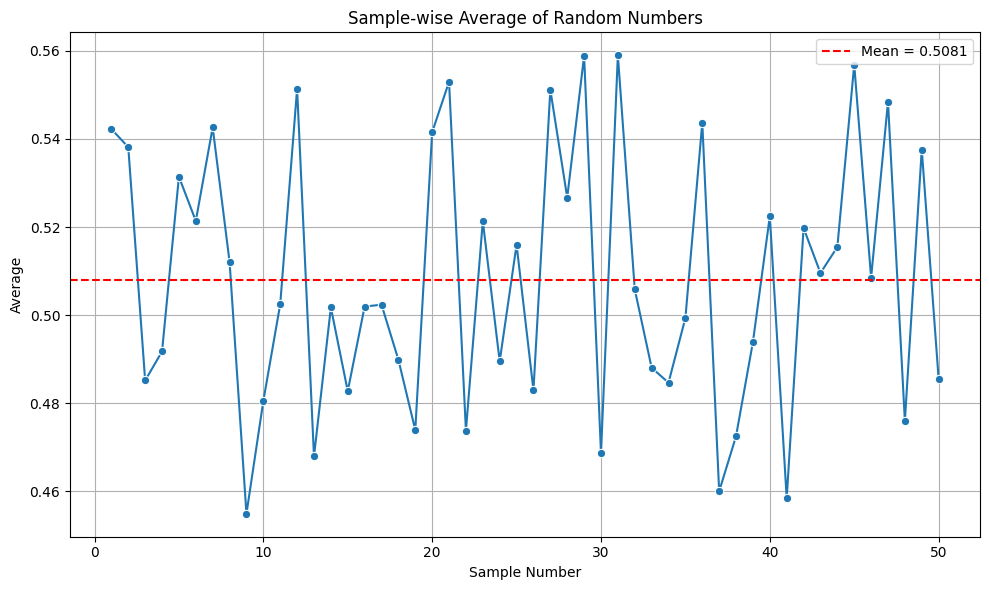

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dd, x="Sample", y="Avg", marker="o")
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Mean = {overall_mean:.4f}')
plt.title("Sample-wise Average of Random Numbers")
plt.xlabel("Sample Number")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="font-size:18px">

## Note:
If this repetition process is run again for different combunation of `k` and `n`, the specific sample means will differ due to randomness, but the overall pattern will remain the same — the sample means will continue to center around the true population mean of 0.5

<span style="font-size:18px">

### Introduction to Hypothesis Testing in Data Science

In **data science**, we are often tasked with making decisions based on data. Whether it's determining if a new marketing strategy improves sales, assessing the effectiveness of a medical treatment, or evaluating the reliability of a machine learning model, we need a systematic way to draw conclusions from data. This is where **hypothesis testing** comes into play.

Hypothesis testing provides a framework for **making inferences** about a population based on a sample. It allows us to assess whether observed data is consistent with a **null hypothesis** (typically representing a baseline assumption, such as "no effect" or "no difference") or if the data provides sufficient evidence to support an **alternative hypothesis** (indicating a significant effect or difference). In this way, hypothesis testing helps us avoid making decisions based on random fluctuations in data, providing a more rigorous approach to problem-solving.

The tools and methods developed for hypothesis testing play a crucial role in **data-driven decision-making**. By testing hypotheses, data scientists can draw valid conclusions, estimate parameters, and assess the significance of their findings in a way that is both repeatable and based on sound statistical principles.

---
### Neyman-Pearson vs Fisher’s Approach to Hypothesis Testing

In **statistical inference**, two influential frameworks for hypothesis testing were developed by **Jerzy Neyman** and **Egon Pearson**, and by **Ronald Fisher**. Both of these approaches have shaped how we conduct hypothesis tests, but they differ in philosophy and methodology.

#### Neyman-Pearson Approach

The **Neyman-Pearson** framework focuses on decision theory and emphasizes controlling the probabilities of making errors in hypothesis testing. 

The Neyman–Pearson framework is a formal approach to hypothesis testing based on long-run error rates. It focuses on making decisions under uncertainty by controlling probabilities of incorrect decisions.

- **Null Hypothesis ($H_0$):** The baseline or default assumption (e.g., no effect, no difference).
- **Alternative Hypothesis ($H_1$):** Represents the effect or difference we are testing for.

We define a **test statistic** based on the sample data and compare it against a threshold (critical value) to decide whether to reject $H_0$.

The primary goal is to make decisions with a **predefined error rate**:

- **Type I Error (False Positive):** Rejecting $H_0$ when it is true.
  - Probability of Type I error = $\alpha$ (significance level)
    
- **Type II Error (False Negative):** Failing to reject $H_0$ when $H_1$ is true.
  - Probability of Type II error = $\beta$


The **Neyman-Pearson Lemma** provides a method to construct the **most powerful test** for simple hypotheses, which maximizes the probability of correctly rejecting $H_0$ while keeping the probability of Type I error fixed at a certain level $\alpha$. This framework is ideal when decisions must be made based on minimizing these error rates (for example, in clinical trials, where you want to control the risk of incorrectly approving a harmful drug).

For testing $H_0: \theta = \theta_0$ against $H_1: \theta = \theta_1$, the test that rejects $H_0$ when the **likelihood ratio** $\Lambda(x) = \frac{L(\theta_0)}{L(\theta_1)}$ is less than a threshold gives the **maximum power** among all tests of a given size $\alpha$.

This lemma justifies the likelihood ratio test (LRT) as the best choice when comparing two specific parameter values.

---

#### Confidence Intervals

A **confidence interval** gives a range of plausible values for a population parameter. A $(1 - \alpha)100\%$ confidence interval contains the true parameter in repeated sampling with probability $1 - \alpha$. While hypothesis tests focus on decision-making, confidence intervals provide more nuanced information about estimation uncertainty.

---
### Decision Theory and Fisher’s Approach to Inference

While Neyman–Pearson emphasized decision rules and long-run error control, **Fisher** viewed statistics primarily as a tool for measuring evidence against a null hypothesis using the **likelihood function**.

---

### Fisher’s Approach

**Fisher’s approach** emphasizes **likelihood-based inference** and treats hypothesis testing as a way of measuring the **evidence** against the null hypothesis. Fisher introduced the concept of the **p-value**, which quantifies the strength of evidence in favor of the null hypothesis. 

In Fisher's framework, there is no strict acceptance or rejection of the null hypothesis. Instead, the p-value provides a measure of how unlikely the observed data is under the assumption of $H_0$. The smaller the p-value, the stronger the evidence against the null hypothesis. Fisher’s approach is more about assessing the plausibility of the null hypothesis given the data, without formally committing to a predefined error rate.

---

### Likelihood-Based Inference

In **Fisher's approach**, the likelihood function $L(\theta)$ summarizes the plausibility of different parameter values given the observed data. Key ideas include:

- **Maximum Likelihood Estimation (MLE):** Choose the parameter value that maximizes the likelihood.
- **Likelihood Ratio:** Used to compare competing hypotheses or models.
- **Fisher Information:** Measures the amount of information the data provides about the parameter.

Fisher’s method emphasizes the use of **p-values**, **likelihood principles**, and **estimation**, whereas Neyman–Pearson provides a structured decision-making framework using fixed error rates and test power.

---


### Key Differences

| **Aspect**                     | **Neyman-Pearson**                        | **Fisher’s Approach**                     |
|---------------------------------|------------------------------------------|-------------------------------------------|
| **Focus**                       | Error rates (Type I and II)              | Likelihood and evidence                   |
| **Test Construction**           | Maximizes power while controlling errors | Focuses on p-values and likelihood ratio  |
| **Hypothesis Testing**          | Fixed decision rules (accept or reject)  | Focuses on evidence, no fixed decision rule |
| **Error Control**               | Explicit control over Type I and II errors | Does not explicitly control errors        |
| **Interpretation**              | Decision-making under fixed error rates  | Measures strength of evidence against $H_0$ |
|**Hypotheses**                | $H_0$ vs $H_1$ (fixed)              | Only $H_0$ (testing its plausibility)|
|**Errors considered**         | Type I and II                       | Type I focus                         |
|**Tools**                     | Test statistics, critical regions   | p-values, likelihoods                |
|**Confidence Intervals**      | Based on fixed $\alpha$             | Derived from likelihood              |


In summary, **Neyman-Pearson** is ideal for situations where we need to make clear decisions with controlled risks, while **Fisher’s approach** is better suited for evaluating evidence and drawing conclusions based on how well the data supports a hypothesis.


### Maximizing a Function Using the Second Derivative Test

In calculus, to find the **maximum** (or minimum) of a function, we first look for **critical points** — points where the derivative is zero or undefined. Then, we use the **second derivative** to determine the nature of those points.

#### General Steps:

Let $f(x)$ be a differentiable function.

1. **Find the First Derivative**:
   $
   f'(x)
   $
   Set it equal to zero and solve:
   $
   f'(x) = 0
   $
   The solutions are called **critical points**.

2. **Apply the Second Derivative Test**:
   Compute the second derivative:
   $
   f''(x)
   $

   - If $f''(x) < 0$ at a critical point $x = c$, then $f$ has a **local maximum** at $x = c$.
   - If $f''(x) > 0$ at a critical point $x = c$, then $f$ has a **local minimum** at $x = c$.
   - If $f''(x) = 0$, the test is **inconclusive** (you may need another method, like the first derivative test or higher derivatives).

---

### Example: Maximize $ f(x) = -x^3 + 3x^2 + 9 $

**Step 1: First Derivative**
$
f'(x) = \frac{d}{dx}(-x^3 + 3x^2 + 9) = -3x^2 + 6x
$
Set it to zero:
$
-3x^2 + 6x = 0 \Rightarrow -3x(x - 2) = 0
\Rightarrow x = 0 \text{ or } x = 2
$

**Step 2: Second Derivative**
$
f''(x) = \frac{d}{dx}(-3x^2 + 6x) = -6x + 6
$

Evaluate the second derivative at each critical point:

- At $ x = 0 $: $ f''(0) = -6(0) + 6 = 6 > 0 $ → Local **minimum**
- At $ x = 2 $: $ f''(2) = -6(2) + 6 = -6 < 0 $ → Local **maximum**

**Conclusion:**  
The function has a **local maximum at $ x = 2 $**.  
Maximum value:
$
f(2) = - (2)^3 + 3(2)^2 + 9 = -8 + 12 + 9 = 13
$

---

### Summary

The **second derivative test** is a powerful tool for determining whether a critical point is a maximum or minimum. It's especially useful in optimization problems common in data science, economics, and engineering.



<span style="font-size:18px">

## <font color=darkgreen> Maximum Likelihood Estimators
    
### Symbols followed

1. $\theta:$ Parameter

1. $f(x_i|\theta):$ Probability density/mass function

1. $L(\theta|X):$ Likelihood function

1. $l(\theta|X)= \ln L(\theta|X):$ Log Likelihood function


An estimator of $\tau(\boldsymbol\theta)$, a function of parameter is **any** function $W(X_1,X_2,.......X_n)$ of a sample; that is **any** statistic is a point estimator  
  
Here, $\boldsymbol{\theta}=(\theta_1, \theta_2........\theta_k)$


### Likelihood and Log-Likelihood

In statistics, particularly in the context of parameter estimation and inference, the **likelihood function** plays a central role. It measures how "likely" the observed data is, given a specific value of a parameter or set of parameters.

---

#### Likelihood Function

Suppose we have a random sample $X_1, X_2, \dots, X_n$ from a population with probability density function (pdf) or probability mass function (pmf) $f(x | \theta)$, where $\theta$ is an unknown parameter.

Given observed data $x_1, x_2, \dots, x_n$, the **likelihood function** is defined as:

$
L(\theta) = \prod_{i=1}^n f(x_i| \theta)
$

Here, the data are fixed, and the likelihood function is viewed as a function of the parameter $\theta$. It tells us how plausible different values of $\theta$ are, given the observed data.

---

#### Log-Likelihood Function

The **log-likelihood function** is the natural logarithm of the likelihood function:

$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log f(x_i| \theta)
$

Taking the logarithm simplifies the mathematical treatment of the likelihood, particularly in calculus-based methods such as **maximum likelihood estimation (MLE)**. The log-likelihood retains all the information of the original likelihood but is easier to work with due to properties of logarithms (e.g., turning products into sums).

---

#### Why Use Log-Likelihood?

- **Simplifies differentiation**: Essential for optimization and deriving MLE.
- **Numerical stability**: Products of small probabilities can lead to underflow; logs avoid this.
- **Additivity**: Makes analysis more tractable, especially when data are independent.

---

### Maximum Likelihood Estimation (MLE)


The process of MLE is to maximize the likelihood function $L(\theta~|~X) = f(X~|~\theta)$, the joint pdf or pmf of the sample X


that is to find a parameter value $\hat\theta(X)$ at which $L(\theta~|~X)$ attains its maximum as a function of $\theta$

The value of $\theta$ that **maximizes the likelihood** (or log-likelihood) is called the **maximum likelihood estimator**:

$
\hat{\theta} = \arg\max_\theta \, L(\theta) = \arg\max_\theta \, \ell(\theta)
$

The MLE is a widely used point estimator because, under general conditions, it has good statistical properties such as consistency, asymptotic normality, and efficiency.

---

### Summary

- The **likelihood function** expresses how plausible a parameter is, given the observed data.
- The **log-likelihood** simplifies the mathematical handling of the likelihood.
- Both form the foundation of likelihood-based inference, including hypothesis testing and model comparison.

---

## <font color=darkgreen> Examples of MLE

We consider the analytical method (calculus approach) using second derivative test to find maximum of a function. However, second derivatives are not explicitly derived in this note.

### <font color=darkblue> Example 1: Bernoulli Distribution

Let $X_1,X_2,...,X_n \sim \text{Bernoulli} (\theta)~~~~~~~ x = 0,~1;~~~~ 0 < \theta<1$

$f(x_i|\theta) = \theta^{x_i} (1-\theta)^{1-x_i} ~~~~~ i = 0,~1$

$\Rightarrow L(\theta|X) = \prod_{i=1}^n f(x_i|\theta)$

$L(\theta|X) =\prod_{i=1}^n \theta^{x_i} (1-\theta)^{1-x_i}$

$L(\theta|X) = \theta^{\sum x_i} (1-\theta)^{n-{\sum x_i}}$

$l(\theta|X) = \sum x_i ~\ln\theta +(n-\sum x_i) ~~\ln(1-\theta)$

$\frac{dl}{d\theta} = \sum x_i \frac{1}{\theta} + \frac{(n-\sum x_i)}{1-\theta} (-1)$

$\frac{dl}{d\theta} = 0$

$\Rightarrow \frac{1}{\theta}\sum x_i - \frac{n-\sum x_i}{1-\theta} = 0$

$\Rightarrow (1-\theta) \sum x_i - (n-\sum x_i) \theta = 0$

$\Rightarrow \sum x_i - n\theta = 0$

**$\hat\theta_{ML} = \frac{\sum x_i}{n} = \bar{X}$**

This result shows that the MLE of the probability of success in a Bernoulli distribution is the **observed proportion of successes**.

---
### <font color=darkblue>  Example 2 Binomial Distribution

Let $X \sim \text{Binomial}(n, \theta)$ where $x = 0, 1, 2, \dots, n$ and $0 < \theta < 1$

The probability mass function (pmf) is:

$ f(x|\theta) = \binom{n}{x} \theta^x (1-\theta)^{n-x} $

Given a **single observation** from the Binomial distribution (e.g., from $n$ Bernoulli trials), the **likelihood function** is:

$ L(\theta|x) = \binom{n}{x} \theta^x (1-\theta)^{n - x} $

Since $\binom{n}{x}$ does not depend on $\theta$, it can be ignored when maximizing the likelihood:

$ L(\theta|x) \propto \theta^x (1-\theta)^{n - x} $

Taking logarithm:

$ \ell(\theta|x) = \log L(\theta|x) = x \ln\theta + (n - x) \ln(1 - \theta) $

To find the maximum likelihood estimator (MLE), differentiate:

$ \frac{d\ell}{d\theta} = \frac{x}{\theta} - \frac{n - x}{1 - \theta} $

Set the derivative to zero

$ \frac{x}{\theta} - \frac{n - x}{1 - \theta} = 0 $

$\implies \frac{x}{\theta} = \frac{n - x}{1 - \theta}$

Now cross-multiplying:

$\implies x(1 - \theta) = (n - x)\theta$

$\implies x - x\theta = n\theta - x\theta$

$\implies x = n\theta$

$\implies \hat{\theta}_{ML} = \frac{x}{n}$



$\therefore,$ the **MLE of $\theta$** is:

$ \hat{\theta}_{ML} = \frac{x}{n} $

This result shows that the MLE of the probability of success in a Binomial distribution is the **observed proportion of successes**.



---

### <font color=darkblue>  Example 3 Poisson Distribution

$X_1,...,X_n \sim \text{Poisson}(\theta)$

$f(x_i~|~\theta) = e^{-\theta}~ \frac{\theta~^{x_i}}{x_i~!}$

$L(\theta|X) = \prod e^{-\theta}~ \frac{\theta~^{x_i}}{x_i!}$

$=e^{-n\theta}~ \frac{\theta~^{\sum x_i}}{\prod x_i!}$

$l(\theta|X) = -n~\theta + \sum x_i \ln \theta + k$

$\frac{\partial~l}{\partial~\theta} = 0$

$\Rightarrow -n + \sum x_i~ \frac{1}{\theta} = 0$

$\Rightarrow n =\frac{\sum x_i}{\theta}$

**$\Rightarrow \hat\theta_{ML} = \bar X$**

---


### <font color=darkblue>  Example 4 Normal Distribution

Let $X_1, X_2, \dots, X_n \sim \text{Normal}(\mu, \sigma^2)$ independently, where $\sigma^2$ is known and $\mu$ is the parameter to be estimated.

The probability density function (pdf) of each observation is:

$ f(x_i | \mu) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) $



### Likelihood Function

The likelihood function is the product of individual densities:

$ L(\mu | X) = \prod_{i=1}^n f(x_i | \mu) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2 \right) $



### Log-Likelihood Function

Taking logarithm:

$\ell(\mu) = \log L(\mu | X) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2$



### First Derivative

Differentiate with respect to $\mu$:

$\frac{d\ell}{d\mu} = -\frac{1}{2\sigma^2} \cdot \frac{d}{d\mu} \left( \sum_{i=1}^n (x_i - \mu)^2 \right)$

$\implies \frac{d\ell}{d\mu} = -\frac{1}{2\sigma^2} \cdot \sum_{i=1}^n (-2)(x_i - \mu)$

$\implies \frac{d\ell}{d\mu} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu)$



### Solving for MLE

Set derivative to zero:

$\frac{d\ell}{d\mu} = 0 \implies \sum_{i=1}^n (x_i - \mu) = 0$

$\implies \sum x_i - n\mu = 0$

$\implies \mu = \frac{1}{n} \sum x_i$



### Conclusion

The **maximum likelihood estimator** of $\mu$ is:

$ \hat{\mu}_{ML} = \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i $

This result shows that the **sample mean** is the MLE of the population mean $\mu$ when the variance is known.

---


Let $X_1, X_2, \dots, X_n \sim \text{Normal}(\mu, \sigma^2)$ independently, where $\mu$ is known and $\sigma^2$ is the parameter to be estimated.

The probability density function is:

$ f(x_i | \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) $

---

### Likelihood Function

$ L(\sigma^2 | X) = \prod_{i=1}^n f(x_i | \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2 \right) $

---

### Log-Likelihood Function

Taking logarithm:

$\ell(\sigma^2) = \log L(\sigma^2 | X) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2$

---

### First Derivative

Differentiate with respect to $\sigma^2$:

$\frac{d\ell}{d\sigma^2} = -\frac{n}{2} \cdot \frac{1}{\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (x_i - \mu)^2$

---

### Solving for MLE

Set derivative to zero:

$\frac{d\ell}{d\sigma^2} = 0 \implies -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum (x_i - \mu)^2 = 0$

Multiply both sides by $2(\sigma^2)^2$:

$\implies -n\sigma^2 + \sum (x_i - \mu)^2 = 0$

$\implies \sum (x_i - \mu)^2 = n\sigma^2$

$\implies \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$

---

### Conclusion

The **maximum likelihood estimator** of $\sigma^2$ (when $\mu$ is known) is:

$ \hat{\sigma}^2_{ML} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2 $

### Neyman-Pearson Hypothesis Testing: Step-by-Step

The **Neyman-Pearson framework** provides a formal method for testing hypotheses with a fixed control on error rates. It is most suited for **comparing two simple hypotheses**:

- Null hypothesis: $H_0$
- Alternative hypothesis: $H_1$

---

#### Steps:

1. **State the Hypotheses**  
   Clearly define the null and alternative hypotheses:  
   $H_0$: The parameter equals $\theta_0$  
   $H_1$: The parameter equals $\theta_1$ (simple vs simple)

2. **Choose a Significance Level ($\alpha$)**  
   Pre-specify the **Type I error rate**:  
   $\alpha = P(\text{Reject } H_0 \mid H_0 \text{ true})$

3. **Construct the Likelihood Ratio**  
   Form the **likelihood ratio test statistic**:  
   $\Lambda(x) = \frac{L(\theta_0 | x)}{L(\theta_1 | x)}$

4. **Determine the Rejection Region**  
   Find a **critical value $k$** such that:  
   Reject $H_0$ if $\Lambda(x) \leq k$  
   (or equivalently, reject $H_0$ if the data strongly favors $H_1$)

   Choose $k$ so that the size of the test is exactly $\alpha$.

5. **Compute the Test Statistic**  
   Plug in the observed data $x$ and calculate $\Lambda(x)$.

6. **Make a Decision**  
   - If $\Lambda(x) \leq k$: **Reject $H_0$** in favor of $H_1$
   - If $\Lambda(x) > k$: **Fail to reject $H_0$**
---

## Common Hypothesis Tests and Confidence Intervals



### 1. One-Sample t-Test (Mean, Unknown Variance)

**Scenario:**  
Test whether the population mean $\mu$ equals a specified value $\mu_0$, using a sample from a Normal population (or approximately Normal for large $n$).

**Hypotheses:**  
$H_0: \mu = \mu_0$  
$H_1: \mu \ne \mu_0$ (or one-sided)

**Test Statistic:**  
$ t = \frac{\bar{X} - \mu_0}{S / \sqrt{n}} \sim t_{n-1} $

Where:
- $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ is the sample mean
- $S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2$ is the sample variance

**Confidence Interval (CI) for $\mu$:**  
$ \bar{X} \pm t_{n-1,\alpha/2} \cdot \frac{S}{\sqrt{n}} $

---

### 2. One-Sample Proportion Test (Large Sample, Binomial)

**Scenario:**  
Test whether the population proportion $p$ equals $p_0$ using a sample from a Bernoulli/binomial distribution.

**Hypotheses:**  
$H_0: p = p_0$  
$H_1: p \ne p_0$ (or one-sided)

**Test Statistic:**  
$ Z = \frac{\hat{p} - p_0}{\sqrt{ \frac{p_0 (1 - p_0)}{n} }} \sim \mathcal{N}(0,1) $

Where:
- $\hat{p} = \frac{x}{n}$ is the sample proportion
- $x$ is the number of successes
- $n$ is the sample size
- $p_0$ is the null hypothesized proportion

**Confidence Interval (CI) for $p$:**  
$ \hat{p} \pm z_{\alpha/2} \cdot \sqrt{ \frac{ \hat{p}(1 - \hat{p}) }{n} } $

---

### 3. Two-Sample Independent t-Test (Equal Variance Assumed)

**Scenario:**  
Compare the means of two independent groups with equal population variances.

**Hypotheses:**  
$H_0: \mu_1 = \mu_2$  
$H_1: \mu_1 \ne \mu_2$ (or one-sided)

**Test Statistic:**  
$ t = \frac{ \bar{X}_1 - \bar{X}_2 }{ S_p \cdot \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} } } $

Where the pooled standard deviation is:
$ S_p^2 = \frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2} $

And the sample means are:
- $\bar{X}_1 = \frac{1}{n_1} \sum_{i=1}^{n_1} X_{1i}$  
- $\bar{X}_2 = \frac{1}{n_2} \sum_{i=1}^{n_2} X_{2i}$

**Degrees of Freedom:**  
$df = n_1 + n_2 - 2$

**Confidence Interval (CI) for $\mu_1 - \mu_2$:**  
$ (\bar{X}_1 - \bar{X}_2) \pm t_{df, \alpha/2} \cdot S_p \cdot \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} } $

---

### 4. Paired t-Test (Dependent Samples)

**Scenario:**  
Test the mean difference between **paired observations** (e.g., before–after measurements on the same units).

**Hypotheses:**  
$H_0: \mu_D = 0$  
$H_1: \mu_D \ne 0$ (or one-sided)

Let:
- $D_i = X_i - Y_i$ (differences), for each pair $i = 1, \dots, n$

**Test Statistic:**  
$ t = \frac{ \bar{D} }{ S_D / \sqrt{n} } \sim t_{n-1} $

Where:
- $\bar{D} = \frac{1}{n} \sum_{i=1}^n D_i$ is the mean of the differences
- $S_D^2 = \frac{1}{n-1} \sum_{i=1}^n (D_i - \bar{D})^2$ is the sample variance of the differences

**Confidence Interval (CI) for $\mu_D$:**  
$ \bar{D} \pm t_{n-1, \alpha/2} \cdot \frac{S_D}{\sqrt{n}} $

---

### 5. Two-Sample Proportion Test (Independent Groups)

**Scenario:**  
Compare the proportions of successes in two independent groups (e.g., success rates for two treatments).

**Hypotheses:**  
$H_0: p_1 = p_2$  
$H_1: p_1 \ne p_2$ (or one-sided)

**Test Statistic:**  
$ Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}} $

Where:
- $\hat{p}_1 = \frac{x_1}{n_1}$ and $\hat{p}_2 = \frac{x_2}{n_2}$ are the sample proportions of successes
- $\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$ is the pooled sample proportion
- $n_1$, $n_2$ are the sample sizes for each group

**Confidence Interval (CI) for $p_1 - p_2$:**  
$ (\hat{p}_1 - \hat{p}_2) \pm z_{\alpha/2} \cdot \sqrt{\hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)} $

---

### Notes:
- **t-tests** are used when the population variance is unknown and we are dealing with small samples.
- **Proportion tests** are appropriate for large samples where binomial distribution is approximated by a normal distribution.
- Use **pooled variance** in two-sample t-tests when variances are assumed equal.
- For **paired t-tests**, data points are not independent but are paired (before and after).
- **Two-sample proportion tests** compare the difference between two population proportions, assuming the samples are independent.

# 
Critical Values and Tail Probabilities in Hypothesis Testing

In hypothesis testing, the **critical value** is a threshold used to determine whether a test statistic falls in the **rejection region** of the null hypothesis. It is based on the significance level, often denoted by **$\alpha$** (alpha), which represents the probability of making a **Type I error** (rejecting the null hypothesis when it is actually true).

## Significance Level ($\alpha$)

- The **significance level** $\alpha$ is typically set at values like 0.05, 0.01, or 0.10, which correspond to the probability of rejecting the null hypothesis incorrectly.
- The **critical region** (or rejection region) is the range of values for which the null hypothesis is rejected.

## Critical Value and Tail Probabilities

The **critical value** depends on:
- The **type of test** (one-tailed or two-tailed).
- The **significance level** $\alpha$.

### Two-Tailed Test:
For a two-tailed hypothesis test (e.g., testing if a population mean is different from a specified value), the critical values are located at the two ends of the distribution. The significance level $\alpha$ is split between the two tails, so each tail has a probability of $\frac{\alpha}{2}$.

For example:
- For $\alpha = 0.05$, each tail of the distribution will have a probability of 0.025 (i.e., $\frac{0.05}{2}$).
- The **critical values** are the points on the distribution that correspond to these tail probabilities. For a normal distribution, these critical values correspond to **$z_{\alpha/2}$**.

### One-Tailed Test:
In a one-tailed hypothesis test (e.g., testing if a population mean is **greater than** or **less than** a specified value), the entire significance level $\alpha$ is placed in one tail of the distribution.

For example:
- For $\alpha = 0.05$ in a **right-tailed test**, the critical value is $z_{\alpha} = z_{0.05} = 1.645$.
- For $\alpha = 0.05$ in a **left-tailed test**, the critical value is $z_{\alpha} = z_{0.95} = -1.645$.

---

## Example Python Code: Critical Value Calculation

### Two-Tailed Test (Normal Distribution)

To compute the critical value for a **two-tailed test**, you can use the **`ppf`** (percent point function) from `scipy.stats`.

```
import scipy.stats as stats

# Significance level
alpha = 0.05

# For two-tailed test, split alpha into two tails
tail_probability = alpha / 2

# Critical values for two-tailed test (upper and lower)
critical_value_upper = stats.norm.ppf(1 - tail_probability)  # Upper critical value
critical_value_lower = stats.norm.ppf(tail_probability)     # Lower critical value

print(f"Upper Critical Value: {critical_value_upper}")
print(f"Lower Critical Value: {critical_value_lower}")

Upper Critical Value: 1.959963984540053
Lower Critical Value: -1.959963984540053
```

For a one-tailed test, the entire significance level $\alpha$ is placed in one tail.

In [22]:
import scipy.stats as stats
# For right-tailed test with alpha = 0.05
alpha = 0.05
critical_value_right = stats.norm.ppf(1 - alpha)

# For left-tailed test with alpha = 0.05
critical_value_left = stats.norm.ppf(alpha)

print(f"Right-Tailed Critical Value: {critical_value_right}")
print(f"Left-Tailed Critical Value: {critical_value_left}")


Right-Tailed Critical Value: 1.6448536269514722
Left-Tailed Critical Value: -1.6448536269514729


### Two-Tailed Test for Proportions

In [23]:
# For two-tailed test with alpha = 0.05
critical_value_proportion = stats.norm.ppf(1 - alpha / 2)

print(f"Critical Value for Two-Sample Proportion Test: {critical_value_proportion}")

Critical Value for Two-Sample Proportion Test: 1.959963984540054


## Example 1: 

A sample of 50 observations from a normal distribution gives a sample mean of 10 and a sample standard deviation of 4. Calculate a 95% confidence interval for the population mean.


### Problem

A sample of 50 observations from a normal distribution gives:
- Sample mean ($\bar{X}$) = 10  
- Sample standard deviation ($S$) = 4  
- Sample size ($n$) = 50  

Construct a **95% confidence interval** for the population mean $\mu$.

---

## Solution

### Step 1: Identify the appropriate formula

Since the population standard deviation is **not known** and the sample size is **moderate**, we use the **t-distribution** for the confidence interval of the population mean:

$ \bar{X} \pm t_{n-1,\alpha/2} \cdot \frac{S}{\sqrt{n}} $

---

### Step 2: Define known values

- $\bar{X} = 10$  
- $S = 4$  
- $n = 50$  
- Degrees of freedom: $df = n - 1 = 49$  
- Significance level: $\alpha = 0.05$ (for 95% CI)  
- Tail probability: $\alpha/2 = 0.025$

From t-table or using Python:

$ t_{49,~0.025} \approx 2.009 $

---

### Step 3: Compute standard error

$ \text{SE} = \frac{S}{\sqrt{n}} = \frac{4}{\sqrt{50}} \approx 0.566 $

---

### Step 4: Calculate the margin of error (ME)

$ \text{ME} = t \cdot \text{SE} = 2.009 \times 0.566 \approx 1.137 $

---

### Step 5: Construct the confidence interval

$ \text{CI} = \bar{X} \pm \text{ME} = 10 \pm 1.137 $

$ \Rightarrow (8.863, ~11.137) $

---

## Final Answer:

The **95% confidence interval** for the population mean $\mu$ is:

$ \boxed{(8.863, ~11.137)} $


## Example 2: 

In a survey of 100 individuals, 65 are found to prefer a particular brand. Calculate a 90% confidence interval for the proportion of individuals who prefer that brand.

## Problem

In a survey of 100 individuals, 65 are found to prefer a particular brand.

That is:
- Sample size ($n$) = 100  
- Number of successes ($x$) = 65  
- Sample proportion ($\hat{p}$) = $\frac{65}{100} = 0.65$

Construct a **90% confidence interval** for the true proportion $p$ of individuals who prefer that brand.

---

## Solution

### Step 1: Identify the formula

For large samples, the **normal approximation** can be used. The confidence interval for a population proportion is given by:

$ \hat{p} \pm z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} } $

---

### Step 2: Define known values

- $\hat{p} = 0.65$  
- $n = 100$  
- Confidence level = 90% $\Rightarrow \alpha = 0.10$  
- Tail probability = $\alpha/2 = 0.05$  
- $z_{0.05} = 1.645$ (from standard normal table)

---

### Step 3: Compute standard error (SE)

$ \text{SE} = \sqrt{ \frac{0.65 \cdot (1 - 0.65)}{100} } = \sqrt{ \frac{0.2275}{100} } = \sqrt{0.002275} \approx 0.0477 $

---

### Step 4: Calculate margin of error (ME)

$ \text{ME} = z \cdot \text{SE} = 1.645 \cdot 0.0477 \approx 0.0785 $

---

### Step 5: Construct the confidence interval

$ \text{CI} = \hat{p} \pm \text{ME} = 0.65 \pm 0.0785 $

$ \Rightarrow (0.5715, ~0.7285) $

---

## Final Answer:

The **90% confidence interval** for the true population proportion $p$ is:

$ \boxed{(0.5715,~0.7285)} $


## Example 3:

In a customer care auto-voicing system, you are tasked with estimating the average number of calls (λ) the system receives per minute. Over the course of 10 days, the following number of calls were observed each day (measured over 10-minute intervals):
{7,9,8,6,10,11,7,8,9,10}. Calculate the Maximum Likelihood Estimate (MLE) of λ. Construct a 95% confidence interval for λ, using the MLE. Explain how the MLE could be used to forecast the expected number of calls for future time periods, such as predicting the number of calls in the next 30 minutes.

## Problem

You are given call data over 10 days, each measured over 10-minute intervals:

Data: {7, 9, 8, 6, 10, 11, 7, 8, 9, 10}

You are asked to:

1. Estimate the average number of calls per minute ($\lambda$) using **Maximum Likelihood Estimation (MLE)**, assuming a **Poisson distribution**.
2. Construct a **95% confidence interval** for $\lambda$.
3. Explain how this estimate can be used for **forecasting** (e.g., number of calls expected in the next 30 minutes).

---

## Step 1: Model Assumption

Assume $X_1, X_2, \dots, X_{10} \sim \text{Poisson}(10 \lambda)$  
(Each observation is over 10 minutes, so the Poisson rate for 10 minutes is $10\lambda$)

---

## Step 2: MLE of $\lambda$

Let the observed values be:

$ \{x_i\} = \{7, 9, 8, 6, 10, 11, 7, 8, 9, 10\} $

Total calls over all intervals:

$ \sum x_i = 85 $

Total time = 10 intervals × 10 minutes = 100 minutes

So, the **MLE of $\lambda$** is:

$ \hat{\lambda}_{\text{MLE}} = \frac{\sum x_i}{\text{Total Time}} = \frac{85}{100} = 0.85 $

---

## Step 3: Confidence Interval for $\lambda$

For a Poisson process, the MLE $\hat{\lambda}$ is approximately normally distributed for large $n$:

$ \hat{\lambda} \sim \mathcal{N}(\lambda, \frac{\lambda}{T}) $

Since we don't know the true $\lambda$, we use the estimate $\hat{\lambda} = 0.85$ to approximate the variance.

Standard error:

$ \text{SE} = \sqrt{\frac{\hat{\lambda}}{T}} = \sqrt{\frac{0.85}{100}} \approx 0.0922 $

Critical value for 95% confidence (normal distribution): $z_{0.025} = 1.96$

Margin of error:

$ \text{ME} = 1.96 \times 0.0922 \approx 0.1807 $

Confidence Interval:

$ \lambda \in (0.85 \pm 0.1807) = (0.6693,~1.0307) $

---

## Step 4: Forecasting Future Calls

Since $\hat{\lambda} = 0.85$ is the estimated **average rate of calls per minute**, we can predict future call volumes using:

- Expected calls in the next **30 minutes**:  
  $ \hat{\lambda} \times 30 = 0.85 \times 30 = 25.5 $

So, we **expect approximately 25 to 26 calls** in the next 30 minutes.

---

## Final Answers

- **MLE of $\lambda$**: $ \boxed{0.85} $
- **95% Confidence Interval for $\lambda$**: $ \boxed{(0.6693,~1.0307)} $
- **Expected number of calls in next 30 minutes**: $ \boxed{25.5} $


## Example 4: 

Suppose a sample of 100 individuals is selected, and the sample mean is 50 with a sample standard deviation of 8. Derive a 95% confidence interval for the population mean. Also, explain how the confidence interval would change if the sample size were increased to 200 or the significance level were changed to 0.10.


## Problem

A sample of 100 individuals gives:
- Sample mean ($\bar{X}$) = 50  
- Sample standard deviation ($S$) = 8  
- Sample size ($n$) = 100  

Construct a **95% confidence interval** for the population mean $\mu$.

Also, explain how the confidence interval would change:
- If the **sample size increased** to 200
- If the **significance level** changed to 0.10 (i.e., 90% confidence)

---

## Step 1: Confidence Interval Formula

Since the population standard deviation is unknown but the sample size is large, we use the **t-distribution**, though for $n = 100$ the $t$ and $z$ values are nearly the same.

General formula for the confidence interval:

$ \bar{X} \pm t_{n-1, \alpha/2} \cdot \frac{S}{\sqrt{n}} $

---

## Step 2: Known Values

- $\bar{X} = 50$  
- $S = 8$  
- $n = 100$, so degrees of freedom = 99  
- For 95% CI: $\alpha = 0.05 \Rightarrow \alpha/2 = 0.025$  
- Critical value: $t_{99, 0.025} \approx 1.984$

---

## Step 3: Standard Error

$ \text{SE} = \frac{S}{\sqrt{n}} = \frac{8}{\sqrt{100}} = \frac{8}{10} = 0.8 $

---

## Step 4: Margin of Error (ME)

$ \text{ME} = 1.984 \times 0.8 = 1.587 $

---

## Step 5: Confidence Interval

$ \mu \in (50 \pm 1.587) = (48.413,~51.587) $

---

## Final Answer

The **95% confidence interval** for the population mean is:

$ \boxed{(48.413,~51.587)} $

---

### Effects of Changes in Sample Size or Significance Level

### 1. **If sample size increases to 200:**

- Standard error becomes:  
  $ \text{SE} = \frac{8}{\sqrt{200}} \approx 0.566 $
- Margin of error becomes:  
  $ \text{ME} = 1.972 \times 0.566 \approx 1.116 $ (using $t_{199, 0.025} \approx 1.972$)
- CI becomes **narrower**:  
  $ \mu \in (50 \pm 1.116) = (48.884,~51.116) $

### 2. **If significance level increases to 0.10 (i.e., 90% confidence):**

- $ \alpha/2 = 0.05 \Rightarrow t_{99, 0.05} \approx 1.660 $
- Margin of error:  
  $ \text{ME} = 1.660 \times 0.8 = 1.328 $
- CI becomes **narrower**:  
  $ \mu \in (50 \pm 1.328) = (48.672,~51.328) $

---

## Conclusion

- **Larger sample size** ⟶ smaller standard error ⟶ **narrower CI** (more precise estimate)
- **Higher significance level** (i.e., lower confidence) ⟶ smaller $t$-value ⟶ **narrower CI** but less confidence

--- 

## Example 5: 
In a hypothesis test where the null hypothesis is $H_0:\mu=15$ and the alternative hypothesis is $H_1:\mu=18$, assume the sample size is 30, the standard deviation is 3, and the significance level is 0.05. Compute both the Type I error (α) and the Type II error (β) at a given value of μ=18. Explain the relationship between the errors and how adjusting the sample size affects both errors.

## Problem

We are testing:

- Null hypothesis: $H_0: \mu = 15$
- Alternative hypothesis: $H_1: \mu = 18$

Given:

- Sample size: $n = 30$
- Population standard deviation: $\sigma = 3$
- Significance level: $\alpha = 0.05$
- We want to compute the **Type II error ($\beta$)** when the true mean is $\mu = 18$

---

## Step 1: Define the test statistic

Assume a **one-sided test** (right-tailed), because $H_1: \mu = 18 > 15$

We use the z-test because $\sigma$ is known:

$
Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
$

Where:
- $\mu_0 = 15$ (value under $H_0$)
- $\bar{X}$ is the sample mean

---

## Step 2: Determine the critical value

At significance level $\alpha = 0.05$, the **critical z-value** is:

$
z_{\alpha} = z_{0.05} = 1.645
$

This corresponds to the rejection region:  
Reject $H_0$ if $Z > 1.645$

---

## Step 3: Find the corresponding critical value of $\bar{X}$

We compute the **critical value** of $\bar{X}$ under $H_0$:

$
\bar{X}_{\text{crit}} = \mu_0 + z_{\alpha} \cdot \frac{\sigma}{\sqrt{n}} = 15 + 1.645 \cdot \frac{3}{\sqrt{30}} \approx 15 + 0.900 = 15.900
$

So, reject $H_0$ if $\bar{X} > 15.900$

---

## Step 4: Compute Type II error ($\beta$)

Type II error: Failing to reject $H_0$ when $\mu = 18$ (true)

$
\beta = P(\bar{X} \leq 15.900 ~|~ \mu = 18)
$

Now compute the z-score under $\mu = 18$:

$
Z = \frac{15.900 - 18}{3/\sqrt{30}} = \frac{-2.1}{0.5477} \approx -3.835
$

$
\beta = P(Z \leq -3.835) \approx 0.00006
$

---

## Step 5: Type I and Type II Errors Summary

- **Type I error ($\alpha$)**: Rejecting $H_0$ when it is true  
  $\alpha = 0.05$ (by design)

- **Type II error ($\beta$)**: Failing to reject $H_0$ when $\mu = 18$  
  $\beta \approx 0.00006$ (very small in this case)

---

## Relationship Between $\alpha$ and $\beta$

- **Trade-off**: Reducing $\alpha$ (more strict) usually increases $\beta$, and vice versa.
- Increasing the **sample size** $n$ reduces the **standard error**, making both errors **smaller** — this increases the **power** of the test.

---

## Final Answer

- $ \boxed{\alpha = 0.05} $
- $ \boxed{\beta \approx 0.00006} $
- Increasing the sample size reduces both $\alpha$ and $\beta$ for the same effect size, increasing the test's ability to detect true differences.

---

## Example 6: 

A company operates two regional branches and wants to determine if one branch has significantly more customer complaints than the other. The data from each branch over the past 6 months are as follows:

Branch 1: 45, 51, 48, 42, 50, 47, 46, 52, 44, 49, 43


Branch 2: 39, 41, 38, 44, 40, 39, 42, 43, 38, 41, 40

The company is interested in understanding whether there is a significant difference in the average number of complaints between the two branches. How would you approach this problem? What actions could the company take based on your findings to improve customer service or allocate resources effectively?

## Problem

The company wants to determine if there is a **significant difference** in the **average number of customer complaints** between:

- **Branch 1**: 45, 51, 48, 42, 50, 47, 46, 52, 44, 49, 43  
- **Branch 2**: 39, 41, 38, 44, 40, 39, 42, 43, 38, 41, 40

We are asked to:

1. Formulate and conduct an appropriate **hypothesis test**
2. Interpret the results
3. Suggest possible **actions** based on the findings

---

## Step 1: Define the Hypotheses

Let $\mu_1$ and $\mu_2$ be the true mean number of complaints for Branch 1 and Branch 2 respectively.

- Null hypothesis: $H_0: \mu_1 = \mu_2$
- Alternative hypothesis: $H_1: \mu_1 \ne \mu_2$ (two-tailed test)

---

## Step 2: Choose the Test

We have **two independent samples**, so we perform a **two-sample t-test** (assuming approximate normality and equal or unequal variances — we'll test both cases).

---

## Step 3: Descriptive Statistics

Let:

- $n_1 = n_2 = 11$ (same number of observations)
- $\bar{X}_1$, $S_1$: mean and standard deviation for Branch 1
- $\bar{X}_2$, $S_2$: mean and standard deviation for Branch 2

We compute:

- $\bar{X}_1 = \frac{\sum X_1}{11} = 47.36$
- $\bar{X}_2 = \frac{\sum X_2}{11} = 40.27$

Standard deviations can be computed using the sample variance formula.

---

## Step 4: Test Statistic (Welch's t-test)

If variances are unequal, use:

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{ \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} }}$

Degrees of freedom (Welch–Satterthwaite approximation):

$df = \frac{ \left( \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} \right)^2 }{ \frac{(S_1^2 / n_1)^2}{n_1 - 1} + \frac{(S_2^2 / n_2)^2}{n_2 - 1} }$

Use $t$-table or Python to compute the $p$-value.

---

## Step 5: Decision Rule

- If $p$-value < $\alpha = 0.05$: Reject $H_0$ — there **is** a significant difference.
- Otherwise, fail to reject $H_0$ — no significant difference detected.

---

## Step 6: Interpretation

If the test concludes a significant difference, this indicates **systematic differences** in complaint rates — possibly due to:

- Staff performance
- Customer volume
- Regional service quality
- Process inefficiencies

---

## Step 7: Business Actions

### If a significant difference is found:
- **Investigate** Branch 1 (higher complaints): Audit processes, retrain staff, assess issue types.
- **Allocate resources**: Support underperforming branch with training, more staff, or new systems.
- **Customer feedback**: Launch surveys to better understand causes of dissatisfaction.

### If no significant difference:
- Maintain existing procedures, monitor monthly for trends.
- Consider qualitative improvements applicable to both branches.

---

## Optional: Python Implementation 

```python
import numpy as np
from scipy import stats

branch1 = [45, 51, 48, 42, 50, 47, 46, 52, 44, 49, 43]
branch2 = [39, 41, 38, 44, 40, 39, 42, 43, 38, 41, 40]

t_stat, p_value = stats.ttest_ind(branch1, branch2, equal_var=False)
print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")


## Example 7

A health researcher wants to determine whether the smoking rate is the same in two different cities. In City A, out of 250 people surveyed, 65 reported being smokers. In City B, out of 200 people surveyed, 55 reported being smokers. The researcher is interested in understanding if the smoking rates in these two cities are different. How would you go about addressing this? What kind of policy recommendations might result from your conclusion?


### Problem 

A health researcher wants to determine whether the smoking rate is the same in two different cities. Specifically:

- In **City A**, 65 out of 250 surveyed people are smokers.
- In **City B**, 55 out of 200 surveyed people are smokers.

We are interested in testing whether the smoking rates in these two cities are statistically different.

---

### Step 1: Define the Hypotheses

We will perform a **two-proportion z-test** to compare the smoking rates (proportions) in the two cities.

- **Null hypothesis ($H_0$)**: The proportion of smokers in City A is the same as the proportion in City B.  
  $$ H_0: p_1 = p_2 $$
- **Alternative hypothesis ($H_1$)**: The proportion of smokers in City A is not the same as the proportion in City B.  
  $$ H_1: p_1 \neq p_2 $$

Where:
- $p_1$ = proportion of smokers in City A
- $p_2$ = proportion of smokers in City B

---

### Step 2: Test Statistic

For a two-proportion z-test, the test statistic is calculated as:

$$
z = \frac{ \hat{p_1} - \hat{p_2} }{ \sqrt{ \hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right) } }
$$

Where:
- $\hat{p_1}$ = sample proportion of smokers in City A = $\frac{65}{250}$
- $\hat{p_2}$ = sample proportion of smokers in City B = $\frac{55}{200}$
- $n_1 = 250$ and $n_2 = 200$ are the sample sizes for City A and City B, respectively.
- $\hat{p}$ = pooled proportion of smokers across both cities:
  $$
  \hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
  $$
  where $x_1 = 65$ and $x_2 = 55$ are the number of smokers in City A and City B, respectively.

---

### Step 3: Compute the Pooled Proportion

The pooled proportion $\hat{p}$ is calculated as:

$$
\hat{p} = \frac{65 + 55}{250 + 200} = \frac{120}{450} = 0.2667
$$

---

### Step 4: Calculate the Test Statistic

Now, we substitute the values into the test statistic formula.

- $\hat{p_1} = \frac{65}{250} = 0.26$
- $\hat{p_2} = \frac{55}{200} = 0.275$
- $\hat{p} = 0.2667$
- $n_1 = 250$, $n_2 = 200$

The test statistic $z$ is:

$$
z = \frac{0.26 - 0.275}{ \sqrt{ 0.2667(1 - 0.2667) \left( \frac{1}{250} + \frac{1}{200} \right) } }
$$

Now, simplifying the terms inside the square root:

$$
\text{Standard Error} = \sqrt{ 0.2667 \times 0.7333 \left( \frac{1}{250} + \frac{1}{200} \right) }
$$

Let's compute the Standard Error:

$$
SE = \sqrt{ 0.2667 \times 0.7333 \left( 0.004 + 0.005 \right) } = \sqrt{ 0.2667 \times 0.7333 \times 0.009 } \approx 0.0203
$$

Now compute $z$:

$$
z = \frac{-0.015}{0.0203} \approx -0.739
$$

---

### Step 5: Decision Rule

The critical z-value for a two-tailed test at $\alpha = 0.05$ is approximately $\pm 1.96$.

- If $|z| > 1.96$, reject $H_0$ (there is a significant difference).
- If $|z| \leq 1.96$, fail to reject $H_0$ (no significant difference).

In this case, $|z| = 0.739$ which is less than 1.96. Therefore, **we fail to reject the null hypothesis**.

---

### Step 6: Conclusion

Since we failed to reject the null hypothesis, we conclude that **there is no significant difference** in the smoking rates between City A and City B at the 0.05 significance level. 

---

### Step 7: Confidence Interval for the Difference in Proportions

To construct a confidence interval for the difference in proportions, we use the following formula:

$$
\hat{p_1} - \hat{p_2} \pm Z_{\alpha/2} \times SE
$$

Where:
- $Z_{\alpha/2} = 1.96$ for a 95% confidence interval
- $SE$ is the standard error calculated earlier

So, the confidence interval is:

$$
(0.26 - 0.275) \pm 1.96 \times 0.0203 = -0.015 \pm 0.0398
$$

Thus, the 95% confidence interval for the difference in smoking rates is:

$$
(-0.0548, 0.0248)
$$

This interval contains 0, which supports our conclusion that there is no significant difference in smoking rates.

---

### Step 8: Policy Recommendations

Given the findings of no significant difference in smoking rates between the two cities, the company might consider the following:

1. **Targeting Smoking Cessation Programs**: Both cities could benefit from similar health interventions aimed at reducing smoking rates, given that the smoking rates are not significantly different.
  
2. **Investigating Other Factors**: If the company wanted to further explore differences in health behaviors between the cities, it might consider factors beyond smoking, such as diet, exercise, or access to healthcare.

3. **Customizing Programs Based on Demographics**: Even if the overall smoking rates are similar, the company could look into specific subgroups (e.g., age, gender) where smoking rates may vary, and tailor programs accordingly.

---

### Optional: Python Code for the Test

```python
import numpy as np
from scipy import stats

# Data
n1 = 250  # Sample size for City A
x1 = 65   # Number of smokers in City A
n2 = 200  # Sample size for City B
x2 = 55   # Number of smokers in City B

# Proportions
p1_hat = x1 / n1
p2_hat = x2 / n2

# Pooled proportion
p_hat = (x1 + x2) / (n1 + n2)

# Standard Error
SE = np.sqrt(p_hat * (1 - p_hat) * (1 / n1 + 1 / n2))

# Z-statistic
z = (p1_hat - p2_hat) / SE

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-statistic: {z:.3f}, P-value: {p_value:.4f}")


## Example 8:

A marketing company wants to investigate whether age influences product preference. They have data from 400 customers, divided into age groups and product preferences, as shown below: 

| Age Group | Product A | Product B | Product C | Product D |
|-----------|-----------|-----------|-----------|-----------|
| 18-24     | 35        | 45        | 30        | 40        |
| 25-34     | 55        | 40        | 60        | 55        |
| 35+       | 30        | 35        | 50        | 55        |

The company wants to know whether there is a relationship between the customers' age groups and their product preferences. How would you approach this investigation? What could the company do with the results in terms of product marketing or customer segmentation?


### Approach to Investigate the Relationship Between Age Group and Product Preference

To determine whether there is a relationship between the customers' age groups and their product preferences, we can perform a **Chi-Square Test of Independence**. This test will help us understand whether the distribution of product preferences varies across different age groups.

---

### Step 1: Define the Hypotheses

- **Null hypothesis ($H_0$)**: There is no relationship between age group and product preference. In other words, the distribution of product preferences is independent of the age group.
  
  $$ H_0: \text{Age Group and Product Preference are independent.} $$

- **Alternative hypothesis ($H_1$)**: There is a relationship between age group and product preference. In other words, the distribution of product preferences depends on the age group.
  
  $$ H_1: \text{Age Group and Product Preference are dependent.} $$

---

### Step 2: Organize the Data

The data is presented in a contingency table format, showing the count of customers from each age group preferring each product.

| Age Group | Product A | Product B | Product C | Product D |
|-----------|-----------|-----------|-----------|-----------|
| 18-24     | 35        | 45        | 30        | 40        |
| 25-34     | 55        | 40        | 60        | 55        |
| 35+       | 30        | 35        | 50        | 55        |

---

### Step 3: Compute the Expected Frequencies

The Chi-Square Test uses the expected frequencies, which are computed under the assumption that the null hypothesis is true (i.e., the variables are independent). The formula for the expected frequency for each cell in the table is:

$$
E_{ij} = \frac{(\text{Row Total}_i) \times (\text{Column Total}_j)}{\text{Grand Total}}
$$

Where:
- $E_{ij}$ is the expected frequency for the cell in row $i$ and column $j$.
- $\text{Row Total}_i$ is the total for the $i$-th row (age group).
- $\text{Column Total}_j$ is the total for the $j$-th column (product preference).
- $\text{Grand Total}$ is the overall total of all observations.

After calculating the expected frequencies for each cell, we compare them with the observed frequencies to determine whether there is a significant difference.

---

### Step 4: Compute the Chi-Square Statistic

The Chi-Square test statistic is calculated using the formula:

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:
- $O_{ij}$ is the observed frequency in the cell for row $i$ and column $j$.
- $E_{ij}$ is the expected frequency in the same cell.

---

### Step 5: Decision Rule

We then compare the computed $\chi^2$ statistic with the critical value from the Chi-Square distribution table at a given significance level (e.g., $\alpha = 0.05$). The degrees of freedom for the test are calculated as:

$$
\text{df} = (r - 1)(c - 1)
$$

Where:
- $r$ is the number of rows (age groups) = 3
- $c$ is the number of columns (products) = 4

So, the degrees of freedom are:

$$
\text{df} = (3 - 1)(4 - 1) = 2 \times 3 = 6
$$

Using a chi-square distribution table, we can find the critical value for $\alpha = 0.05$ and $\text{df} = 6$.

If the calculated $\chi^2$ statistic is greater than the critical value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

---

### Step 6: Compute the P-Value

Alternatively, we can compute the p-value associated with the chi-square statistic. If the p-value is less than the chosen significance level ($\alpha = 0.05$), we reject the null hypothesis.

---

### Step 7: Conclusion

- If the p-value is smaller than 0.05 (or the $\chi^2$ statistic is larger than the critical value), **we reject the null hypothesis** and conclude that there is a significant relationship between the age group and product preference. This suggests that the product preference is dependent on the age group.
- If the p-value is greater than 0.05 (or the $\chi^2$ statistic is smaller than the critical value), **we fail to reject the null hypothesis**, meaning that there is no significant relationship between the age group and product preference, and the product preferences are independent of age.

---

### Step 8: Recommendations Based on the Results

If we find a significant relationship between age group and product preference, the marketing company can consider the following actions:

1. **Targeted Marketing Campaigns**: The company can develop targeted marketing campaigns for different age groups based on their preferences. For example, if a specific product is preferred by younger individuals, the company can focus marketing efforts on that demographic group.
  
2. **Product Development**: The company might focus on enhancing products that are preferred by certain age groups, ensuring they meet the needs and desires of their target market.

3. **Customer Segmentation**: The company can use the findings to better segment their customer base and tailor product offerings to different customer segments.

---

### Optional: Python Code for the Chi-Square Test

Here’s the Python code to perform the Chi-Square Test using `scipy`:

```python
import numpy as np
from scipy.stats import chi2_contingency

# Data: Age groups vs Product preferences
data = np.array([[35, 45, 30, 40],
                 [55, 40, 60, 55],
                 [30, 35, 50, 55]])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between age group and product preference.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between age group and product preference.")



## Example 9: 

In a real-time scenario, a company wants to estimate the average time customers spend on their website. They collect a sample of 50 customer visits, and the sample mean is 12 minutes with a sample standard deviation of 3 minutes. Assuming the data follows a normal distribution, how would you derive the confidence interval for the population mean at a 95% confidence level? What assumptions are made during this derivation?

### Estimating the Confidence Interval for the Population Mean

In this scenario, the company wants to estimate the average time customers spend on their website. Based on the sample data, we will derive the **95% confidence interval for the population mean** using the formula for a confidence interval when the population standard deviation is unknown and the data follows a normal distribution.

---

### Given Data

- Sample size ($n$): 50
- Sample mean ($\bar{x}$): 12 minutes
- Sample standard deviation ($s$): 3 minutes
- Confidence level: 95%

---

### Step 1: Identify the Type of Distribution

Since the sample size is relatively large ($n = 50$), we will use the **t-distribution** to derive the confidence interval. The t-distribution is used because the population standard deviation is unknown, and we are estimating it from the sample.

---

### Step 2: Confidence Interval Formula

The formula for the confidence interval for the population mean, when the population standard deviation is unknown, is:

$$
\bar{x} \pm t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
$$

Where:
- $\bar{x}$ is the sample mean.
- $t_{\alpha/2}$ is the t-critical value corresponding to the confidence level ($\alpha = 0.05$ for a 95% confidence interval).
- $s$ is the sample standard deviation.
- $n$ is the sample size.
- $\sqrt{n}$ is the square root of the sample size.

---

### Step 3: Find the t-Critical Value

For a 95% confidence level, the critical value $t_{\alpha/2}$ is determined using the **t-distribution** with $n - 1 = 50 - 1 = 49$ degrees of freedom.

Using a t-distribution table or a statistical software, we find that for $\alpha/2 = 0.025$ and 49 degrees of freedom, the t-critical value is approximately **2.0096**.

---

### Step 4: Calculate the Margin of Error

The margin of error is given by:

$$
\text{Margin of Error} = t_{\alpha/2} \cdot \frac{s}{\sqrt{n}} = 2.0096 \cdot \frac{3}{\sqrt{50}} \approx 2.0096 \cdot 0.424 \approx 0.852
$$

---

### Step 5: Derive the Confidence Interval

Now that we have the margin of error, we can calculate the confidence interval:

$$
\bar{x} \pm \text{Margin of Error} = 12 \pm 0.852
$$

Thus, the 95% confidence interval for the population mean is:

$$
(12 - 0.852, 12 + 0.852) \Rightarrow (11.148, 12.852)
$$

Therefore, we are **95% confident** that the true population mean lies between **11.148 minutes and 12.852 minutes**.

---

### Assumptions Made During This Derivation

1. **Normality of Data**: The data is assumed to follow a normal distribution. This assumption is important because the t-distribution is most accurate when the underlying data is normally distributed, especially for smaller sample sizes.
   
2. **Random Sampling**: The sample of 50 customer visits is assumed to be randomly selected from the population, ensuring that the sample is representative of the population.
   
3. **Independence**: The observations (i.e., customer visits) are assumed to be independent of each other.

---

### Conclusion

The 95% confidence interval for the average time customers spend on the website is $(11.148, 12.852)$ minutes. This means that the company can be 95% confident that the true average time spent by customers lies within this range. If they wanted to reduce the margin of error, they could increase the sample size or lower the confidence level.


## Example 10:

**Scenario 1: Testing the Effectiveness of a New Drug**

A pharmaceutical company wants to test if a new drug is more effective than the existing treatment in reducing blood pressure. The company has data from two groups: one group that received the new drug, and another that received the existing treatment.

**Scenario 2: Analyzing the Proportion of Defective Products**

A manufacturer wants to determine if the proportion of defective products in a batch exceeds the accepted standard of 5%. A sample of 200 products is tested, and 15 are found to be defective.

**Scenario 3: Examining the Relationship Between Gender and Voting Preference**

A political pollster wants to understand if there is a relationship between gender (male or female) and voting preference for two political parties. Data is collected from a random sample of 500 voters.


As a Data Analyst, how would you plan your analysis and then proceed to the mathematical, statistical, and computational aspects of the analysis?

### Scenario 1: Testing the Effectiveness of a New Drug

#### Quantity of Interest:
The quantity of interest in this scenario is the **mean reduction in blood pressure** between two treatment groups: one receiving the new drug and the other receiving the existing treatment.

#### Nature of the Problem:
This is a **comparative analysis** between two independent groups (new drug vs existing treatment). The goal is to determine if the new drug is more effective than the existing treatment in reducing blood pressure. The problem focuses on comparing **two population means**.

#### What We Try to Do:
- **Hypothesis Testing**: We aim to test if the **mean reduction in blood pressure** for the new drug group is statistically significantly greater than that for the existing treatment group. This is a **two-sample t-test** problem.
- The null hypothesis ($H_0$) assumes there is no difference in mean reductions, while the alternative hypothesis ($H_1$) assumes the new drug is more effective.
- Based on the test result, if we reject $H_0$, we may conclude that the new drug is more effective than the existing treatment.
- We also construct a **confidence interval** to estimate the range of differences in means between the two groups.

---

### Scenario 2: Analyzing the Proportion of Defective Products

#### Quantity of Interest:
In this scenario, the quantity of interest is the **proportion of defective products** in a batch and whether it exceeds the accepted standard of 5%.

#### Nature of the Problem:
This is a **proportion comparison** problem. The goal is to test if the **proportion of defective products** exceeds the standard threshold (5%), and whether the batch quality meets the company's standards. It is a **one-sample z-test** for proportions.

#### What We Try to Do:
- **Hypothesis Testing**: The null hypothesis ($H_0$) assumes the proportion of defective products is equal to the standard (5%), and the alternative hypothesis ($H_1$) tests if the proportion exceeds 5%.
- If the null hypothesis is rejected, the company can investigate whether quality control measures need to be improved.
- A **confidence interval** is constructed for the population proportion, providing an estimate of the proportion of defective products in the entire batch.

---

### Scenario 3: Examining the Relationship Between Gender and Voting Preference

#### Quantity of Interest:
The quantity of interest here is the **relationship between gender (male/female)** and **voting preference** for two political parties (Party A and Party B). This is a **categorical relationship** where we are interested in determining whether gender influences voting behavior.

#### Nature of the Problem:
This is a **test of independence** problem, where we examine if two categorical variables (gender and voting preference) are related. Specifically, we are interested in whether the distribution of voting preferences differs between males and females. This is tested using the **Chi-squared test of independence**.

#### What We Try to Do:
- **Hypothesis Testing**: The null hypothesis ($H_0$) assumes there is no relationship between gender and voting preference (i.e., the two variables are independent), while the alternative hypothesis ($H_1$) assumes that gender influences voting preference.
- If the null hypothesis is rejected, we conclude that gender and voting preference are dependent, meaning that gender may influence voting decisions.
---

### Conclusion and Policy Recommendations

1. **Scenario 1 (Drug Testing)**: After conducting the two-sample t-test, if the new drug is found to be more effective, the company can proceed with promoting the drug for wider distribution. Alternatively, if the result is not significant, the company might reconsider the drug or further investigate the methodology behind the testing.
   
2. **Scenario 2 (Defective Products)**: If the proportion of defective products exceeds 5%, the company should investigate the manufacturing process and possibly improve quality control measures. The confidence interval provides additional context by estimating the range of defect proportions in the batch.

3. **Scenario 3 (Voting Preference and Gender)**: If a significant relationship is found between gender and voting preference, political campaigns can be better targeted based on gender demographics. For example, they might allocate resources differently depending on which gender shows stronger preferences for a particular party.

### Statistical Modeling Considerations:
For each scenario:
- **Data Collection**: Ensure that the sample is random and representative to avoid bias in inference.
- **Assumptions**: Be mindful of the assumptions underlying each statistical test, such as normality for t-tests and the expected frequency condition for the Chi-squared test.
- **Interpretation of Results**: A statistically significant result doesn't always imply a meaningful or actionable result. Consider the **practical significance** and **context** when interpreting p-values and confidence intervals.